## Classification

In [ ]:
from sklearn.linear_model import LogisticRegression

X = df_hrv_scaled['HRV']
y = df_hrv_scaled['At work']

log_reg = LogisticRegression()
log_reg.fit()

,date,HRV (SDNN),Is at Work (binary),Is Above Mean Value,Hour of Day,Day of Week,Is Morning,t+1
0,2018-01-16 09:00:00,38.754700,1,0,9,2,1,NaN
1,2018-01-16 10:00:00,36.479380,1,0,10,2,1,38.754700
2,2018-01-16 11:00:00,34.204060,1,0,11,2,1,36.479380
3,2018-01-16 12:00:00,31.928740,1,0,12,2,0,34.204060
4,2018-01-16 13:00:00,29.653420,1,0,13,2,0,31.928740
5,2018-01-16 14:00:00,27.378100,1,0,14,2,0,29.653420
6,2018-01-16 15:00:00,29.384314,1,0,15,2,0,27.378100
7,2018-01-16 16:00:00,31.390529,1,0,16,2,0,29.384314
8,2018-01-16 17:00:00,33.396743,0,0,17,2,0,31.390529
9,2018-01-16 18:00:00,35.402957,0,0,18,2,0,33.396743


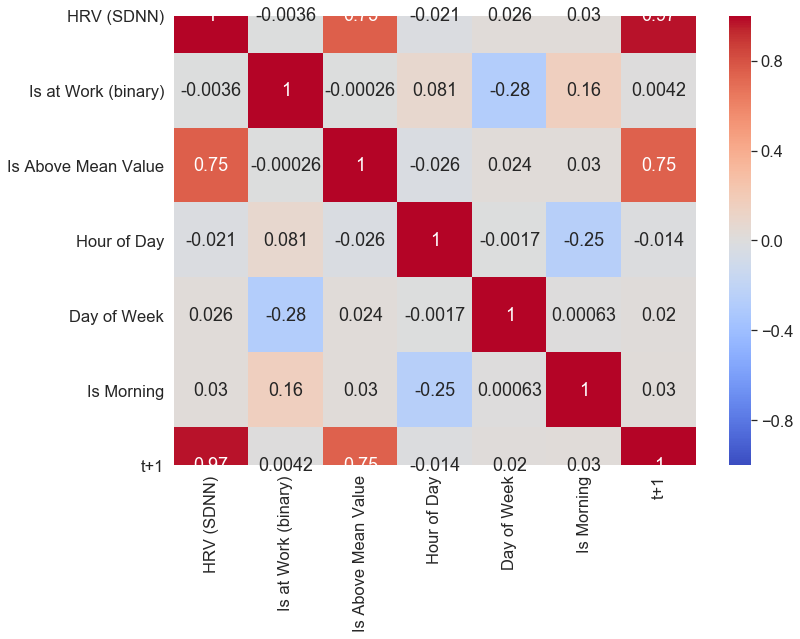

In [5]:
import seaborn as sns
from matplotlib import dates
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler
import tabulate
warnings.filterwarnings('ignore')
# sns.set(font_scale=5.5)
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.5)
df_hrv = pd.read_csv("../data/original/HeartRateVariabilitySDNN.csv")

def parse_date(x):
    return pd.datetime.strptime(x[:-6],'%Y-%m-%d %H:%M:%S')

series = pd.read_csv('../data/original/HeartRateVariabilitySDNN.csv', header=0, index_col=5, parse_dates=[5], squeeze=True, date_parser=parse_date)

df_new = pd.DataFrame()
df_new['value'] = series['value'].resample('H').mean().interpolate()
df_new['creationDate'] = pd.to_datetime(df_new.index)
df_new = df_new.reset_index(drop=True)

df_new['t+1'] = df_new['value'].shift(periods=1)
df_new['t+24'] = df_new['value'].shift(periods=24)
df_new.head()

df_hrv_filtered = df_new

##### 

scaler = StandardScaler()
hrv_merged = pd.DataFrame()

def at_work(row):
#     print(row['creationDate'].hour)
    derp = row['creationDate'].hour
    hour = row['creationDate'].hour
    weekday = row['creationDate'].isoweekday()
    
    if((hour >= 9 and hour <17) and weekday < 6):
        # print(pd.to_datetime(row['creationDate']), (weekday))
        return 1
    return 0
    
# winter is from 1st of November to 1st of April
def is_winter(row):
    month = pd.to_datetime(row['creationDate'], format='%d/%m').month
    
    if(month >= 10 or month < 4):
        return 1
    return 0

def is_higher_than_mean(row):
    mean = 41.25
    if row.value > mean:
        return 1
    return 0

def get_hour_of_day(row):
    hour = pd.to_datetime(row['creationDate']).hour
    return hour

def get_day_of_week(row):
    weekday = pd.to_datetime(row['creationDate']).isoweekday()
    return weekday

def get_time_of_day(row):
    hour = pd.to_datetime(row['creationDate']).hour
    
    if((hour >= 6 and hour <12)):
        return 1
    return 0
    
    
hrv_merged['date'] = df_hrv_filtered['creationDate']
hrv_merged['HRV (SDNN)'] = df_hrv_filtered['value']

work_hours = []
winter_time = []
above_mean = []
hour_of_day = []
day_of_week = []
time_of_day = [] # is morning or afternoon



for (index, row) in df_hrv_filtered.iterrows():

        
    work_hours.append(at_work(row))
#     winter_time.append(is_winter(row))
    above_mean.append(is_higher_than_mean(row))
    hour_of_day.append(get_hour_of_day(row))
    day_of_week.append(get_day_of_week(row))
    time_of_day.append(get_time_of_day(row))
    if (row['value'] > 150):
        df_hrv_filtered.drop(index, inplace=True)
    
hrv_merged['Is at Work (binary)'] = work_hours
hrv_merged['Is Above Mean Value'] = above_mean
hrv_merged['Hour of Day'] = hour_of_day
hrv_merged['Day of Week'] = day_of_week
hrv_merged['Is Morning'] = time_of_day
# hrv_merged['new date'] = hrv_merged['date'].astype(np.int64).values.reshape(-1,1)
hrv_merged['t+1'] = df_hrv_filtered['t+1']

hrv_merged.to_csv('../data/hrv_shaped.csv')

sns.heatmap(hrv_merged.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

hrv_merged.head(50)

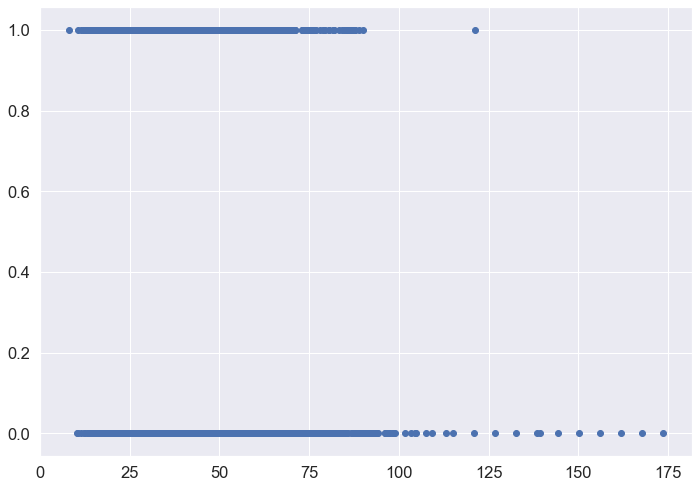

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X = hrv_merged['HRV (SDNN)'].values.reshape(-1,1)
y = hrv_merged['Is at Work (binary)']

plt.scatter(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [133]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

print('coef: {0}'.format(log_reg.coef_))
print('intercept: {0}'.format(log_reg.intercept_))

y_pred = log_reg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

y_proba = log_reg.predict_proba(X_test)

confusion_matrix(y_test, y_pred)



coef: [[-0.00029922]]
intercept: [-1.14354015]
Accuracy of logistic regression classifier on test set: 0.77
(3015, 2)


array([[2309,    0],
       [ 706,    0]])

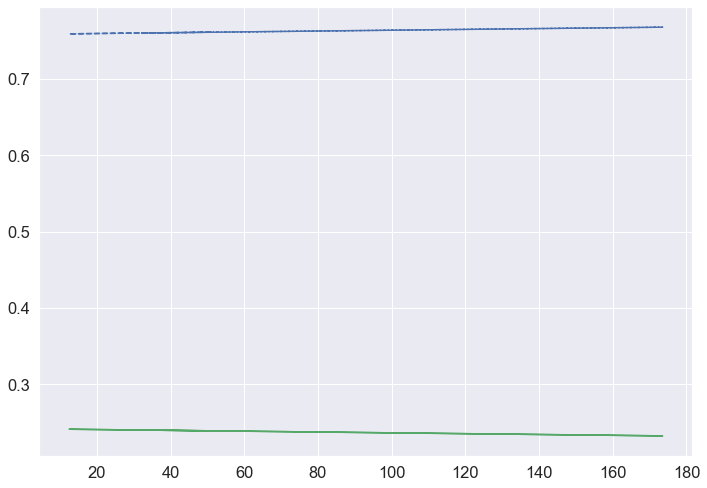

In [134]:
plt.plot(X_test, y_proba[:,1], "g-", label="Is At Work")
plt.plot(X_test, y_proba[:,0], "b--", label="Is Not At Work")



In [130]:
log_reg.predict([[5], [125]])

array([2, 7])